<a href="https://colab.research.google.com/github/radhika1603/Marketing-Research-Assignment/blob/main/Cox's_Proportional_Hazard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=447873024bd6682e3760222aabbce087ab5ee0e2aa300a9f0490e3b3ecfc7d25
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
import os

file_path = "/mnt/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Proceeding with loading.")
else:
    print("File not found. Please re-upload.")


File not found. Please re-upload.


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -14343.46
         time fit was run = 2025-02-04 07:29:02 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
SeniorCitizen      0.02      1.02      0.05           -0.08            0.13                0.92                1.14
MonthlyCharges     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Contract_One year -2.19      0.11      0.08           -2.35           -2.02                0.10                0.13
Contract_Two year -4.22      0.01      0.16           -4.53           -3.91                0.01                0.02

                   cmp to      z      p  -log2(p)
covariate                                        
SeniorCitizen        0.00   0.41   0.68      0.56
MonthlyCharges       0.00   0.15   0.88      0.18
Contract_One year    0.00 -26.08 <0.005    495.61
Contract_Two year    0.00 -26.82 <0.005    523.91
---
Concordance = 0.76
Partial AIC = 28694.91
log-likelihood ratio test = 2619.17 on 4 df
-log2(p) of ll-ratio test = inf

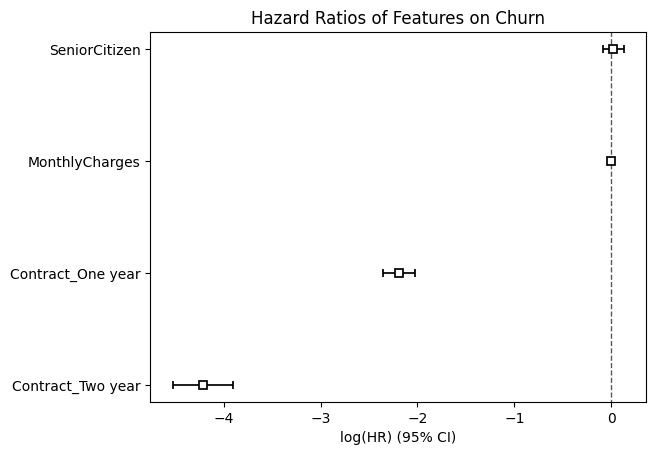

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load dataset from the correct path
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Convert 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

# Convert categorical target variable to numeric
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Select relevant features and one-hot encode categorical variables
df_encoded = pd.get_dummies(df[["tenure", "Churn", "SeniorCitizen", "Contract", "MonthlyCharges"]], drop_first=True)

# Define Cox model input
cph = CoxPHFitter()
cph.fit(df_encoded, duration_col="tenure", event_col="Churn")

# Display model summary
cph.print_summary()

# Plot hazard ratios
cph.plot()
plt.title("Hazard Ratios of Features on Churn")
plt.show()
